In [1]:
#notatki z tablicy
# liczymy srednia dla kolumn
# odejmujemy x od kolumn
# liczymi macierz kowariancji dla b
# liczymy wartosci wlasne -> v_ww, m_ww
# sortujemy malejaco argsort
# przycinamy od n
# rzutowanie 

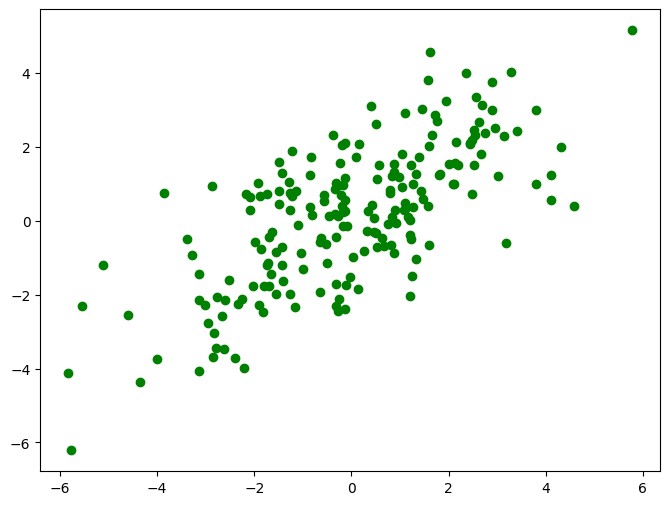

In [19]:
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

X = np.dot(np.random.randn(200, 10), np.random.rand(10, 2))

iris = datasets.load_iris()
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

def wiPCA(X, n_comp):
    mean = np.mean(X, axis=0)
    B = X - mean
    B_cov = np.cov(B, rowvar=False)
    V, Z = np.linalg.eigh(B_cov)
    sort = np.argsort(V)[::-1]
   
    V = V[sort]
    V = V[:n_comp]
    
    Z = Z[:, sort]
    Z = Z[:, :n_comp]
    
    Xr = B @ Z
    return Xr, Z, V, mean

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1],  color="green")
plt.show()


[[-1.79852763]
 [-1.28098383]]


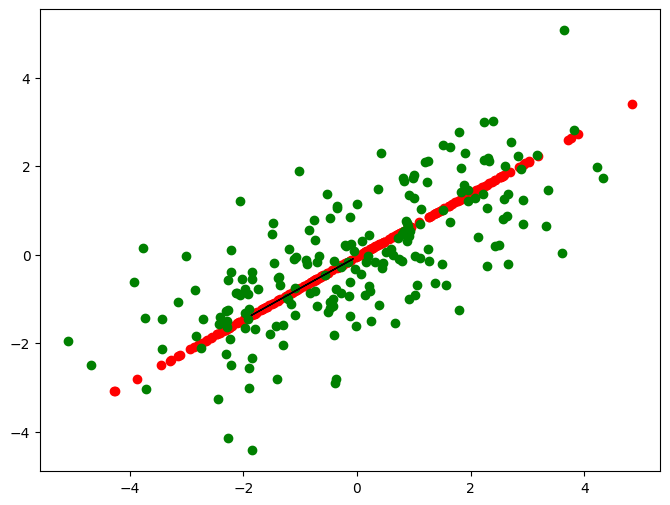

In [18]:
Xr, Z, V, xs = wiPCA(X, 1)
O = np.dot(Xr, Z.T) + xs
plt.figure(figsize=(8, 6))
plt.scatter(O[:, 0], O[:, 1], color='red')
plt.scatter(X[:, 0], X[:, 1], color="green")

a = np.sqrt(V) * Z
plt.arrow(xs[0], xs[1], a[0, 0], a[1, 0], fc='black', ec='black')
print(a)

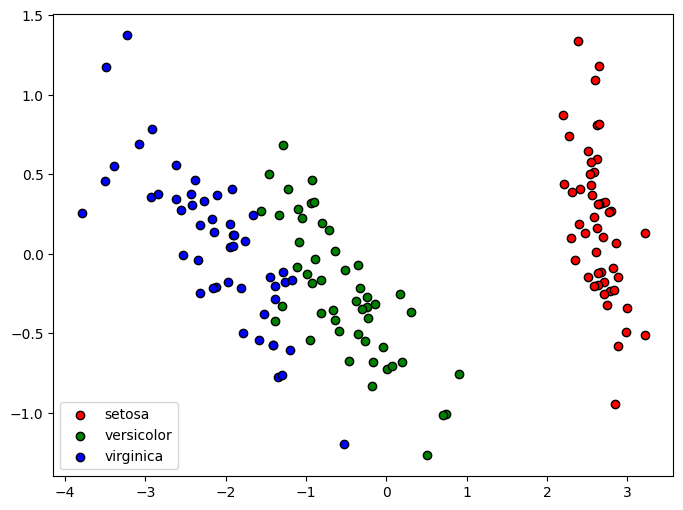

In [30]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
tn = iris.target_names
Xr, _, _, _ = wiPCA(X, 2)

plt.figure(figsize=(8, 6))

plt.scatter(Xr[y == 0, 0], Xr[y == 0, 1], label=tn[0], marker='o', color='red', edgecolor='k')
plt.scatter(Xr[y == 1, 0], Xr[y == 1, 1], label=tn[1], marker='o', color='green', edgecolor='k')
plt.scatter(Xr[y == 2, 0], Xr[y == 2, 1], label=tn[2], marker='o', color='blue', edgecolor='k')

plt.legend()
plt.show()

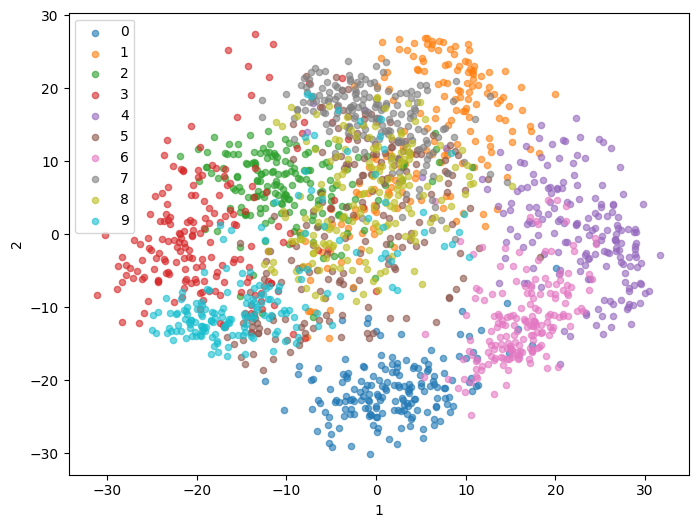

In [ ]:
Xr, _, _, _ = wiPCA(X, 2)

plt.figure(figsize=(8, 6))
for n in np.unique(y):
    plt.scatter(Xr[y == n, 0], Xr[y == n, 1],label=str(n), alpha=0.6, s=20)
plt.legend()
plt.xlabel("1")
plt.ylabel("2")
plt.show()